# OSEMN Exercises

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [2]:
x = np.random.random(345)
file_name='random.txt'

with open(file_name, mode='w') as f:
    for i in x:
        f.write(str(i)+'\n')
        

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [3]:
#dumb way
m = np.random.random_sample((5,5))
file_name ='matrix.txt'

rows, columns = np.shape(m)
with open(file_name, mode='w') as f:
    for i in range(rows):
        for j in range(columns):
            f.write(str(m[i][j])+'\t')
        f.write('\n')

In [4]:
#smart way
m = np.random.random_sample((5,5))
file_name ='matrix_2.txt'

with open(file_name, mode='w') as f:
    
    np.savetxt(file_name, m, delimiter=' ', newline='\n')

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [5]:
import csv

txt_file = "matrix_2.txt"
csv_file = "matrix_2.csv"


with open(txt_file, mode='r') as r, open(csv_file, mode='w') as w:
    stripped = (line.strip() for line in r)
    lines = (line.split(',') for line in stripped if line)
    writer=csv.writer(w)
    writer.writerows(lines)
   

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [6]:
infile='credit_card.dat'
outfile='credit_card.txt'
with open(infile, 'r') as r, open(outfile, 'w') as w:
    
    for line in r:
        
        stripped = line.strip()
        line_array = stripped[:-4]
        
        N = len(line_array)
        
        converted = ""
        
        for i in range(0, int(N), 6):
            num = int (line_array[i:i+6], 2)
            
            converted += chr(num)
        
        w.write(converted+'\n')    
         
        
        
  
             

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [7]:
import json
import csv
data = json.load( open ('user_data.json') )

data = [j for j in data if j['CreditCardType']=='American Express']

csv_file = 'user_data1.csv'
with open(csv_file, mode='w') as w:
    
    writer=csv.writer(w)
    writer.writerow(data[0].keys())
    for row in data:
        writer.writerow(row.values())
    

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath yuou see


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

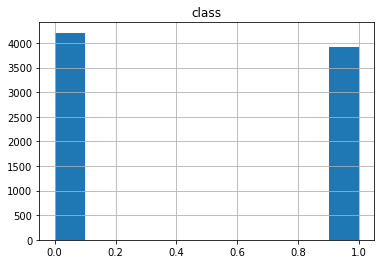

In [8]:
#! wget https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1 -P ~/data/
#!cat /home/giulia/data/mushrooms_categorized.csv?dl=1 
data = pd.read_csv(r'/home/giulia/data/mushrooms_categorized.csv?dl=1')
#print(data)

ax  = plt.figure(figsize=(6,4))
data.hist(column='class', bins=10)


7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

Text(0, 0.5, 'features_3')

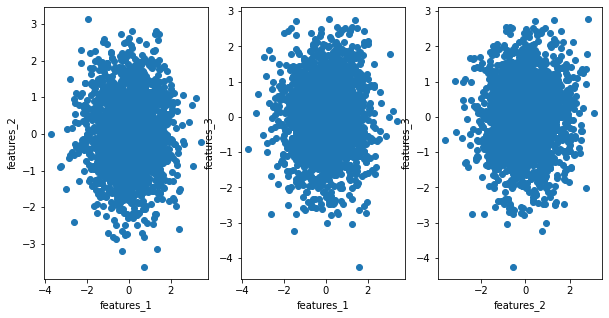

In [9]:
#!wget  https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1 -P ~/data/
data = pd.read_csv(r'~/data/regression_generated.csv?dl=1')
#print(data)
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].scatter(data['features_1'], data['features_2'])
ax[0].set_xlabel('features_1')
ax[0].set_ylabel('features_2')
ax[1].scatter(data['features_1'], data['features_3'])
ax[1].set_xlabel('features_1')
ax[1].set_ylabel('features_3')
ax[2].scatter(data['features_2'], data['features_3'])
ax[2].set_xlabel('features_2')
ax[2].set_ylabel('features_3')

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [10]:
import json 

data = pd.read_json(r'user_data.json', orient='record' )

data = data[data['CreditCardType']=='American Express']
#print(data)

export_csv = data.to_csv (r'user_data.csv', index = None, header=True, sep = '\t')